In [ ]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [ ]:
fruit <- c("a",'b','c')

In [ ]:
print(fruit)

[1] "a" "b" "c"


In [ ]:
print(c)

[1] 12


**Exercise 1: PimaIndiansDiabetes**

In [ ]:
install.packages("mlbench")
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(PimaIndiansDiabetes)
head(PimaIndiansDiabetes, n=10)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg
7,3,78,50,32,88,31.0,0.248,26,pos
8,10,115,0,0,0,35.3,0.134,29,neg
9,2,197,70,45,543,30.5,0.158,53,pos


In [ ]:
str(PimaIndiansDiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [ ]:
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

In [ ]:
dim(PimaIndiansDiabetes)

[1] 768   9

In [ ]:
y <- PimaIndiansDiabetes$diabetes
cbind(freq=table(y), percentage=prop.table(table(y))*100)

sapply(PimaIndiansDiabetes[,1:8], var)

,freq,percentage
neg,500,65.10417
pos,268,34.89583


pregnant      glucose     pressure      triceps      insulin         mass 
1.135406e+01 1.022248e+03 3.746473e+02 2.544732e+02 1.328118e+04 6.215998e+01 
    pedigree          age 
1.097786e-01 1.383030e+02

In [ ]:
sapply(PimaIndiansDiabetes[,1:8], sd)

pregnant     glucose    pressure     triceps     insulin        mass 
  3.3695781  31.9726182  19.3558072  15.9522176 115.2440024   7.8841603 
   pedigree         age 
  0.3313286  11.7602315

In [ ]:
remove.packages("e1071")

Removing package from ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
library(e1071)
skew <- apply(PimaIndiansDiabetes[,1:8], 2, skewness)
skew

pregnant    glucose   pressure    triceps    insulin       mass   pedigree 
 0.8981549  0.1730754 -1.8364126  0.1089456  2.2633826 -0.4273073  1.9124179 
       age 
 1.1251880

In [ ]:
kur <- apply(PimaIndiansDiabetes[,1:8], 2, kurtosis)
kur

pregnant    glucose   pressure    triceps    insulin       mass   pedigree 
 0.1421840  0.6193695  5.1175100 -0.5309369  7.1331349  3.2449627  5.5285389 
       age 
 0.6217269

In [ ]:
correlations <- cor(PimaIndiansDiabetes[,1:8])
correlations

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123
glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432
pressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795
triceps,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026
insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295
mass,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187
pedigree,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131
age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000


In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded



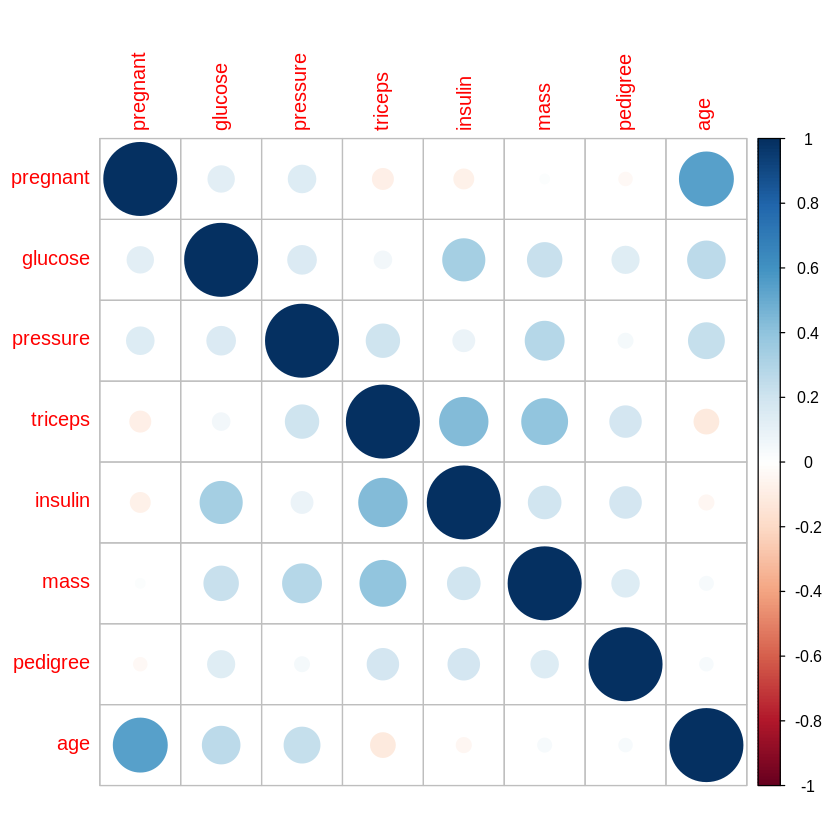

In [ ]:
library(corrplot)
corrplot(correlations)

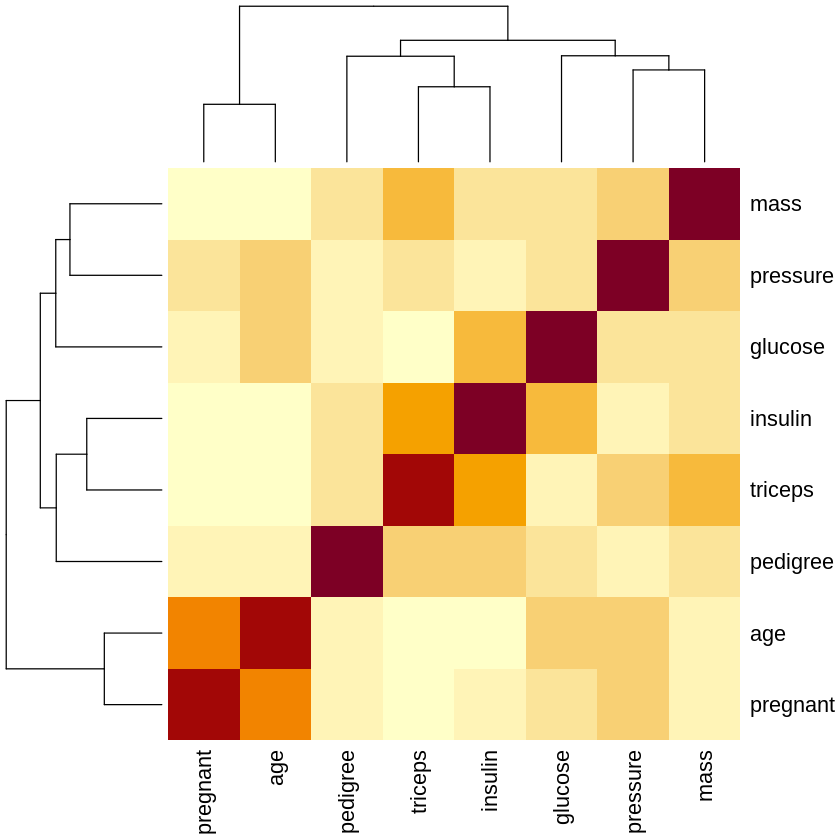

In [ ]:
heatmap(x = correlations)

In [ ]:
ages = quantile(PimaIndiansDiabetes$age, c(0.05, 0.15, 0.25, 0.50, 0.75, 0.90))
ages

5% 15% 25% 50% 75% 90% 
 21  22  24  29  41  51

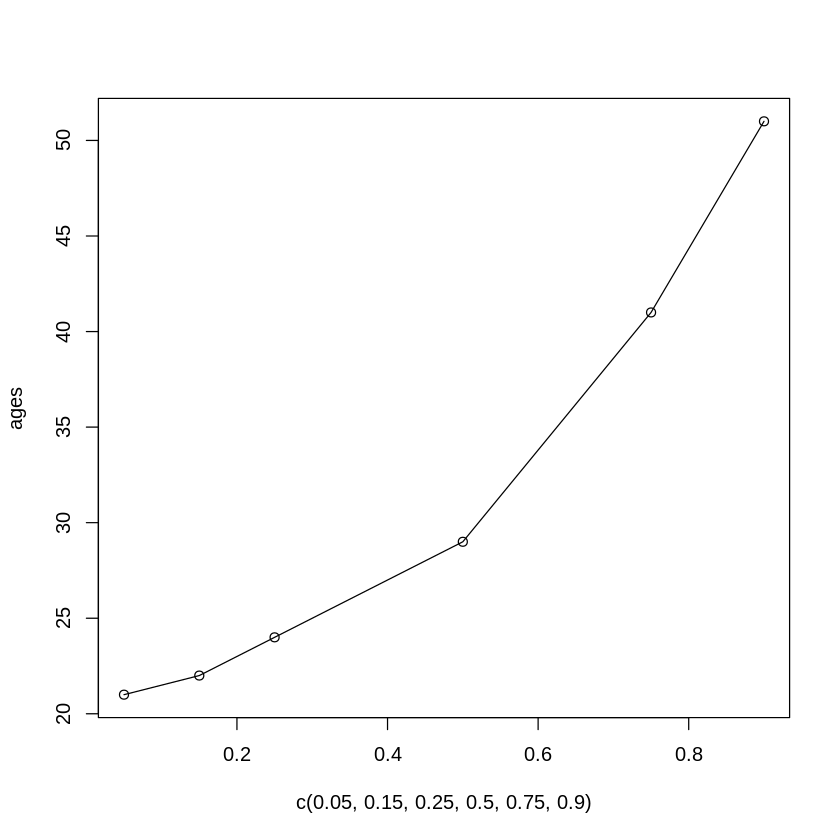

In [ ]:
plot(c(0.05, 0.15, 0.25, 0.50, 0.75, 0.90), ages, type = "o")